## Optimizing Revenue and Driver Retention in the Taxi Industry: A Data-Driven Analysis of Payment Methods, Fare Pricing, and Revenue Forecasting¶

### Introduction¶
In the highly competitive rental taxi sector, optimizing revenue and ensuring driver satisfaction are crucial for sustained growth and long-term success. With the increasing reliance on data-driven decision-making, understanding the factors influencing fare pricing and revenue generation has become essential. This research aims to uncover actionable insights by analyzing the impact of different payment methods on fare amounts, and developing predictive models to estimate fare prices and driver tips.

### Objective¶
By leveraging data-driven insights and predictive analytics, this research seeks to provide a comprehensive understanding of revenue dynamics in the taxi industry. The findings will guide strategic decisions to maximize profits, improve driver satisfaction, and ensure a competitive edge in the rapidly evolving market.

Payment Methods and Fare Pricing: Analyze if different payment methods (e.g., cash, credit/debit card) affect fare amounts. This includes conducting a A/B testing, using python hypothesis testing and descriptive statistics to extract useful information to generate more cash for drivers. In particular, to validate any observed differences in fare pricing of card versus cash payment.

Predictive Modeling: Develop models to predict fare prices and driver tips, aiding in profit estimation and driver retention. Additionaly, suggest tip amount to customers by predicting tips based on trip distance and duration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

In [2]:
warnings.filterwarnings('ignore')

###  Loading dataset

In [5]:
df = pd.read_csv(r'C:\Users\user\Downloads/2020_Yellow_Taxi_Trip_Data.csv')

In [7]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### Exploratory Data Analysis

In [9]:
df.shape

(24648499, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24648499 entries, 0 to 24648498
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 3.3+ GB


In [11]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [14]:
df['trip_timings'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration'] = df['trip_timings'].dt.total_seconds()/60

In [16]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_timings',
       'trip_duration'],
      dtype='object')

### Payment Methods and Fare Pricing:
Since our objective revolves around payment type, fare amount and any other factor influencing the fare amount ,we are filtering only the required columns for statistical analysis.

In [18]:
df = df[['passenger_count', 'trip_distance','payment_type','fare_amount','trip_duration']]
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [19]:
#checking for missing values
df.isnull().sum()

passenger_count    809568
trip_distance           0
payment_type       809568
fare_amount             0
trip_duration           0
dtype: int64

In [20]:
print('Missing data %:')
round(df.isnull().sum()*100/df.shape[0],2)

Missing data %:


passenger_count    3.28
trip_distance      0.00
payment_type       3.28
fare_amount        0.00
trip_duration      0.00
dtype: float64

In [21]:
df.dropna(inplace=True)


In [22]:
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
24549234,1.0,11.30,2.0,33.0,26.050000
24549235,1.0,2.18,1.0,9.0,8.216667
24549236,1.0,2.52,1.0,9.5,8.133333
24549237,1.0,0.59,1.0,4.5,2.700000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23838931 entries, 0 to 24549238
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   trip_distance    float64
 2   payment_type     float64
 3   fare_amount      float64
 4   trip_duration    float64
dtypes: float64(5)
memory usage: 1.1 GB


In [24]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [25]:
#checking for duplicate values
df[df.duplicated()==True]

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
2064,1,0.00,2,7.0,0.000000
2451,1,0.00,1,52.0,0.200000
2456,2,1.70,1,9.5,13.066667
2476,1,0.40,1,4.0,3.083333
3358,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
24549232,3,0.82,2,6.0,6.433333
24549233,1,1.83,1,7.0,6.183333
24549235,1,2.18,1,9.0,8.216667
24549236,1,2.52,1,9.5,8.133333


In [26]:
# dropping duplicate values as they won't contribute in analysis
df.drop_duplicates(inplace=True)
df.shape

(7664923, 5)

In [27]:
# passenger count distribution
df['passenger_count'].value_counts()

passenger_count
1    4319571
2    1446682
3     548840
5     505746
6     353020
4     295544
0     195335
7         84
8         52
9         49
Name: count, dtype: int64

In [28]:
# dropping zero passenger count as no passenger means no one paid the fare amount
df = df[(df['passenger_count']!=0) & (df['passenger_count']<7)]
df['passenger_count'].value_counts()

passenger_count
1    4319571
2    1446682
3     548840
5     505746
6     353020
4     295544
Name: count, dtype: int64

In [29]:
# payment type distribution
df['payment_type'].value_counts()

payment_type
1    4864460
2    2454556
3      85731
4      64641
5         15
Name: count, dtype: int64

In [30]:
df = df[df['payment_type']<3]
df['payment_type'].value_counts()

payment_type
1    4864460
2    2454556
Name: count, dtype: int64

In [31]:
# Changing the encoded values of payment type to actual labels
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [32]:
df.describe()

,passenger_count,trip_distance,fare_amount,trip_duration
count,7.319016e+06,7.319016e+06,7.319016e+06,7.319016e+06
mean,1.978300e+00,5.227476e+00,1.963208e+01,2.839155e+01
std,1.482294e+00,7.944994e+01,1.584677e+01,2.982134e+02
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-5.312312e+05
25%,1.000000e+00,1.800000e+00,1.000000e+01,1.116667e+01
50%,1.000000e+00,3.390000e+00,1.500000e+01,1.751667e+01
75%,2.000000e+00,6.600000e+00,2.400000e+01,2.573333e+01
max,6.000000e+00,1.673295e+05,6.964000e+03,8.525117e+03


Trip distance, fare amount, trip duration cannot be negative. Need to remove the wrong values. Also there are lot of outliers present in these values as there is a huge gap between 75 percentile and max value.¶s

In [33]:
# removing negative values
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['trip_duration']>0]
df.shape

(7209548, 5)

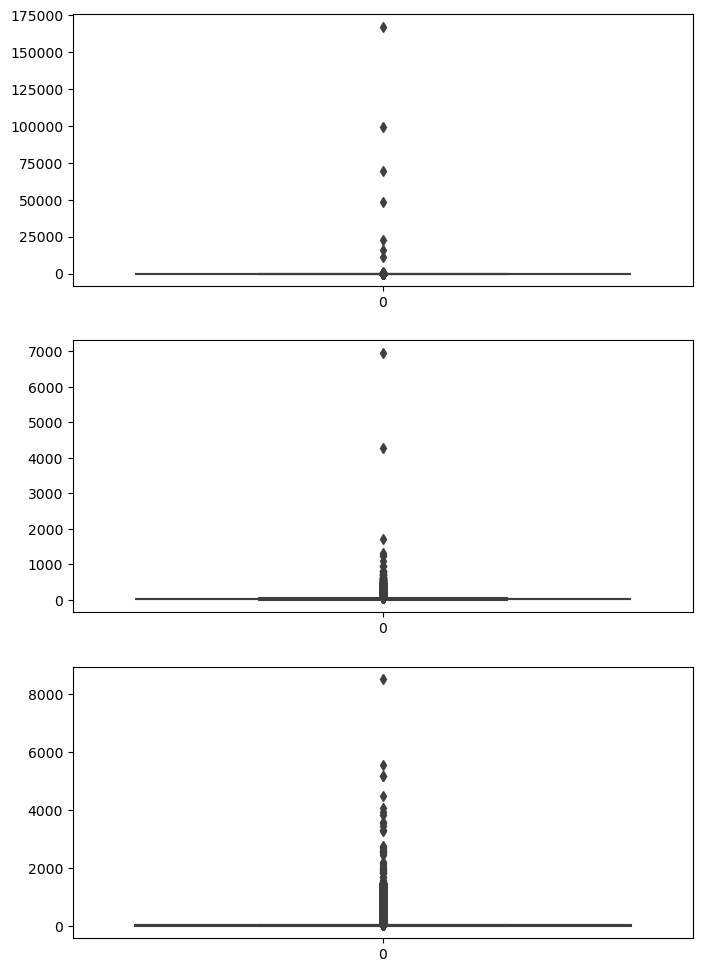

In [34]:
# checking outliers
plt.figure(figsize = (8,12))
plt.subplot(3,1,1)
sns.boxplot(df['trip_distance'])
plt.subplot(3,1,2)
sns.boxplot(df['fare_amount'])
plt.subplot(3,1,3)
sns.boxplot(df['trip_duration'])
plt.show()

In [35]:
# removing outliers using IQR method

   

for col in ['trip_distance','fare_amount','trip_duration']:
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.75)
    IQR = q2-q1
    lower_bound = q1-1.5*IQR
    upper_bound = q2+1.5*IQR
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
 
    


In [36]:
df.describe()

,passenger_count,trip_distance,fare_amount,trip_duration
count,6.305863e+06,6.305863e+06,6.305863e+06,6.305863e+06
mean,2.047626e+00,3.831850e+00,1.531707e+01,1.689621e+01
std,1.520414e+00,2.795227e+00,7.648838e+00,8.401080e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.720000e+00,9.500000e+00,1.050000e+01
50%,1.000000e+00,3.040000e+00,1.400000e+01,1.605000e+01
75%,2.000000e+00,5.200000e+00,2.000000e+01,2.238333e+01
max,6.000000e+00,1.396000e+01,3.823000e+01,4.133333e+01


- The objective is to explore relationship between payment type and the concerning trip distance and fare amount.¶
Are there variations in the payment type concerning different fare amounts or trip distance?¶

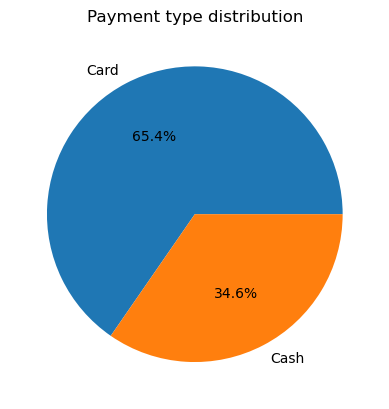

In [37]:
plt.title('Payment type distribution')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts(normalize=True).index,
       autopct='%1.1f%%')
plt.show()

## Card payment is more, clocking at 65.4%¶

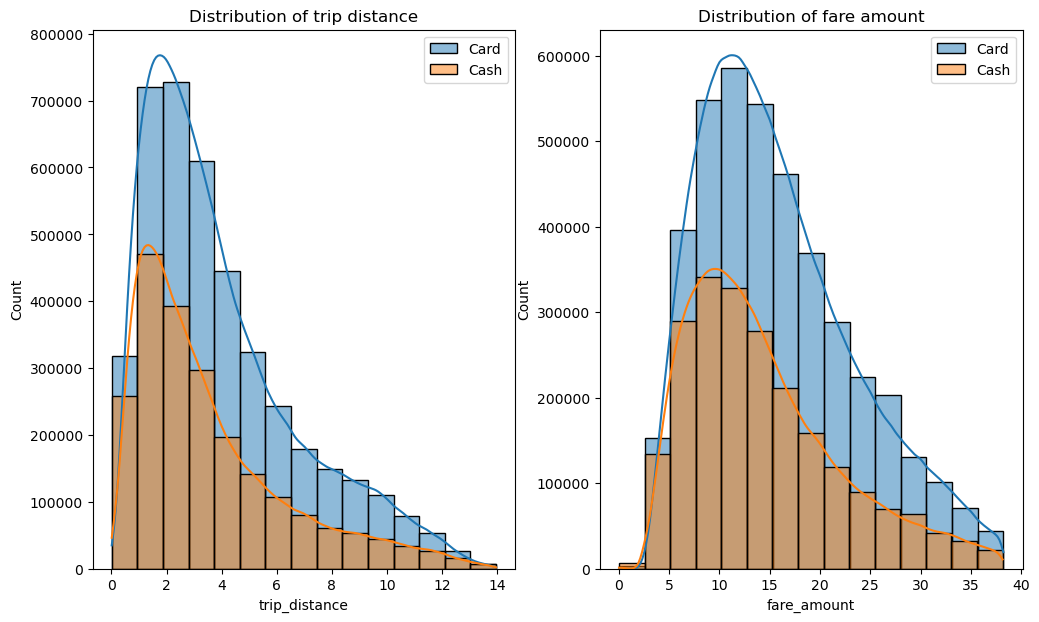

In [38]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
sns.histplot(df[df['payment_type']=='Card']['trip_distance'],bins = 15,kde=True,label='Card')
sns.histplot(df[df['payment_type']=='Cash']['trip_distance'],bins = 15,kde=True,label='Cash')
plt.legend()
plt.subplot(1,2,2)
plt.title('Distribution of fare amount')
sns.histplot(df[df['payment_type']=='Card']['fare_amount'],bins = 15,kde=True,label='Card')
sns.histplot(df[df['payment_type']=='Cash']['fare_amount'],bins = 15,kde=True,label='Cash')
plt.legend()
plt.show()

In [39]:
df.groupby(['payment_type']).agg({'trip_distance':['mean','std'],'fare_amount':['mean','std']})

trip_distance           fare_amount          
                      mean       std        mean       std
payment_type                                              
Card              3.978898  2.792324   15.834915  7.639275
Cash              3.554207  2.779571   14.339326  7.570896

- The mean for card is more than cash in both trip distance and fare amount. This indicates that passengers are more inclined to pay with card.¶
- On any trip distance card is the preffered mode, however when the fare amount is on lower scale there is less difference between the preferences.
- But as distance and fare amount increase, the preference to pay with card increases.
- Subsequently, the objective now is to analysis the payment types in relation to the passenger count.
- Our objective is to check whether there are any changes in payment preference related to the number of passengers travelling in the cab.¶

In [46]:
# checking the payment type distribution in percentage based on passenger count
payment=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
payment.rename(columns = {'passenger_count':'count'},inplace = True)
payment.reset_index(inplace=True)
payment['percentage'] = (payment['count']/payment['count'].sum())*100
payment

,payment_type,passenger_count,count,percentage
0,Card,1,2223557,35.261740
1,Card,2,821816,13.032570
2,Card,3,337592,5.353621
3,Card,4,180708,2.865714
4,Card,5,327810,5.198495
5,Card,6,230996,3.663194
6,Cash,1,1255346,19.907600
7,Cash,2,430581,6.828264
8,Cash,3,163974,2.600342
9,Cash,4,90881,1.441214


In [41]:
# rearranging the data for horizontal stacked bar chart
payment_dist = pd.DataFrame(columns=['payment_type',1,2,3,4,5,6])
payment_dist['payment_type']=['Card','Cash']
payment_dist.iloc[0,1:]=payment.iloc[:6,3]
payment_dist.iloc[1,1:]=payment.iloc[6:,3]
payment_dist

,payment_type,1,2,3,4,5,6
0,Card,35.26174,13.03257,5.353621,2.865714,5.198495,3.663194
1,Cash,19.9076,6.828264,2.600342,1.441214,2.273123,1.574122


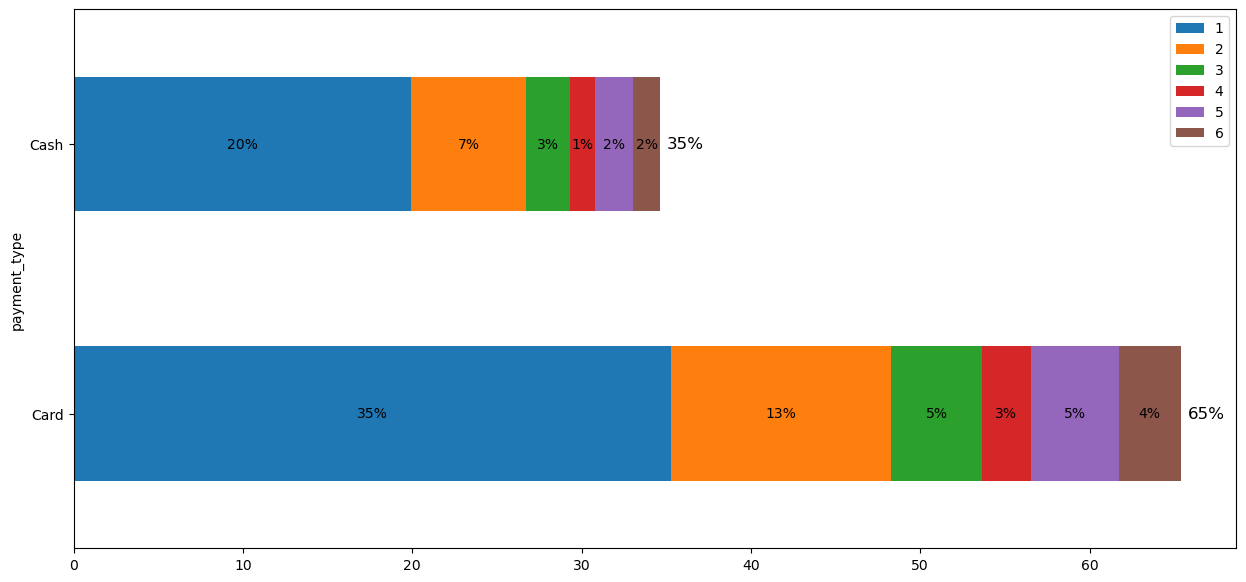

In [42]:
# plotting the horizontal bar chart
fig,ax = plt.subplots(figsize=(15,7))
payment_dist.plot(x='payment_type',kind='barh',stacked=True,ax=ax)

for i in ax.patches:
    w = i.get_width()
    h = i.get_height()
    x,y = i.get_xy()
    ax.text(x+w/2,y+h/2,'{:.0f}%'.format(w),ha='center',va='center')
    
totals = payment_dist.iloc[:,1:].sum(axis=1)
for i, total in enumerate(totals):
    y=i
    ax.text(total+1.5, y,'{:.0f}%'.format(total), ha='center', va = 'center', fontsize = 12)

- Passenger count of 1 constitutes maximum of the payments in both cash and card payment followed by passenger count of 2.- 
The plot also says that card payment is preffered in any number of passenger counts.
on.

In [47]:
import statsmodels.api as sm

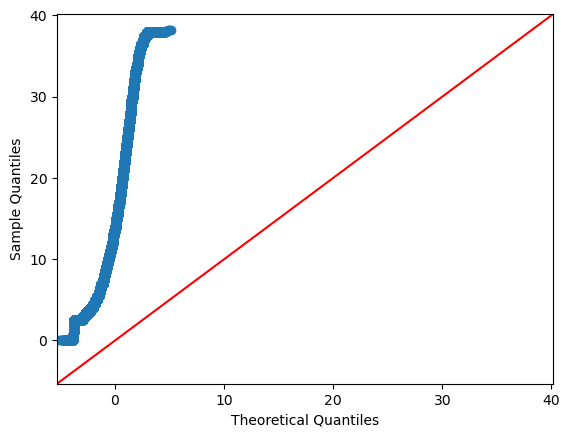

In [48]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

- The data plots do not align (not even closely) to the diagonal line, suggesting it doesn't follow a normal distribution.- 
So instead of z-test we will use a t-test for our hypothesis testing. Moreover the population variance is also not known suggesting that a t-test will be a better estimate as it can accomodate the uncertainities that come with estimating population parameters from sample data.h.¶

### Null hypothesis: 
- There is no difference in average fare between customers who use credit card and customers who use cash.
### Alternate hypothesis: 
- There is a difference in average fare between customers who use credit and customers who use cash.¶

In [49]:
# sample 1
card_sample = df[df['payment_type']=="Card"]['fare_amount']
# sample 2
cash_sample = df[df['payment_type']=="Cash"]['fare_amount']

- Performing an F-test to check the relation between variances of the sample

In [50]:
t_stats, p_value = st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False) # variances are not equal
print('T statistic', t_stats, 'p-value',p_value)

T statistic 235.27559801716524 p-value 0.0


In [51]:
# two sample t-test
t_stats, p_value = st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False) # variances are not equal
if p_value < 0.05:
    print(f'p_value = {p_value}, Reject null hypothesis')
else:
    print(f'p_value = {p_value},Accept null hypothesis')

p_value = 0.0, Reject null hypothesis


- Since the p-values is less than the significance level of 5%, the null hypothesis is rejected.¶
- There is a statistically significant difference in average fare amount between passengers who pay with cash and passengers who use card.
- The bussiness can generate more revenue by encouraging customers to pay with card and should market offers or advertisements accordingly¶